## Importing and preparing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,confusion_matrix

In [2]:
df1=pd.read_csv('mHealth_subject1.csv')
df2=pd.read_csv('mHealth_subject2.csv')
df3=pd.read_csv('mHealth_subject3.csv')
df4=pd.read_csv('mHealth_subject4.csv')
df5=pd.read_csv('mHealth_subject5.csv')
df6=pd.read_csv('mHealth_subject6.csv')
df7=pd.read_csv('mHealth_subject7.csv')
df8=pd.read_csv('mHealth_subject8.csv')
df9=pd.read_csv('mHealth_subject9.csv')
df10=pd.read_csv('mHealth_subject10.csv')
df1["subject"]=["subject1"]*len(df1)
df1=df1[:-1]
df2["subject"]=["subject2"]*len(df2)
df2=df2[:-1]
df3["subject"]=["subject3"]*len(df3)
df3=df3[:-1]
df4["subject"]=["subject4"]*len(df4)
df4=df4[:-1]
df5["subject"]=["subject5"]*len(df5)
df5=df5[:-1]
df6["subject"]=["subject6"]*len(df6)
df6=df6[:-1]
df7["subject"]=["subject7"]*len(df7)
df7=df7[:-1]
df8["subject"]=["subject8"]*len(df8)
df8=df8[:-1]
df9["subject"]=["subject9"]*len(df9)
df9=df9[:-1]
df10["subject"]=["subject10"]*len(df10)
df10=df10[:-1]
# Renaming acceleration and gyro columns
def renameAccelerationAndGyroColumns(df):
    df.rename(columns={
        'acceleration from the left-ankle sensor (X axis)':'alx',
        'acceleration from the left-ankle sensor (Y axis)':'aly',
        'acceleration from the left-ankle sensor (Z axis)':'alz',
        'gyro from the left-ankle sensor (X axis)':'glx',
        'gyro from the left-ankle sensor (Y axis)':'gly',
        'gyro from the left-ankle sensor (Z axis)':'glz',
        'acceleration from the right-lower-arm sensor (X axis)':'arx',
        'acceleration from the right-lower-arm sensor (Y axis)':'ary',
        'acceleration from the right-lower-arm sensor (Z axis)':'arz',
        'gyro from the right-lower-arm sensor (X axis)':'grx',
        'gyro from the right-lower-arm sensor (Y axis)':'gry',
        'gyro from the right-lower-arm sensor (Z axis)':'grz',
        'Label':'Activity'
    },inplace=True)
renameAccelerationAndGyroColumns(df1)
renameAccelerationAndGyroColumns(df2)
renameAccelerationAndGyroColumns(df3)
renameAccelerationAndGyroColumns(df4)
renameAccelerationAndGyroColumns(df5)
renameAccelerationAndGyroColumns(df6)
renameAccelerationAndGyroColumns(df7)
renameAccelerationAndGyroColumns(df8)
renameAccelerationAndGyroColumns(df9)
renameAccelerationAndGyroColumns(df10)
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10],ignore_index=True)

In [3]:
df=df.iloc[:,[5,6,7,8,9,10,14,15,16,17,18,19,23,24]]

## Resampling imbalanced data

In [4]:
data_activity_0=df[df['Activity']==0]
data_activity_else=df[df['Activity']!=0]
data_activity_0=data_activity_0.sample(n=40000,random_state=42)
df=pd.concat([data_activity_0,data_activity_else])

<AxesSubplot:title={'center':'Data afetr sampling'}>

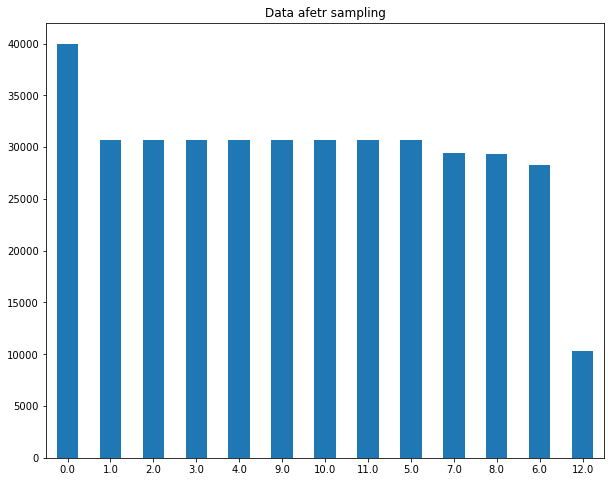

In [5]:
plt.figure(figsize=(10,8))
plt.title('Data afetr sampling')
df['Activity'].value_counts().plot.bar(rot=0)

In [21]:
label_map={
    0:'Nothing',
    1:'Standing still',  
    2:'Sitting and relaxing', 
    3:'Lying down',  
    4:'Walking',  
    5:'Climbing stairs',  
    6:'Waist bends forward',
    7:'Frontal elevation of arms', 
    8:'Knees bending (crouching)', 
    9:'Cycling', 
    10:'Jogging', 
    11:'Running', 
    12:'Jump front & back' 
}

In [6]:
# As per me we don't need Subject for traning our dataset . As this mention particular person
df=df.drop(columns=['subject'])

## We need to create Activity as numerical data to train it properly

In [13]:
df.Activity=df["Activity"].astype(int)

In [14]:
df['Activity'].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5])

## We need to Standardize the data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
s=StandardScaler()

In [17]:
x=df.iloc[:,:12]
y=df.iloc[:,12]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)
y_train

362304     0
113900    12
473597     4
809392     6
947994     9
          ..
664687     3
582121    10
564926     8
789362     2
8725       1
Name: Activity, Length: 287396, dtype: int32

In [22]:
import seaborn as sns
def resultsSummarizer(y_true,y_pred):
    cm=confusion_matrix(y_true,y_pred)
    acc=accuracy_score(y_true,y_pred)
    prec=precision_score(y_true,y_pred,average='macro')
    rec=recall_score(y_true,y_pred,average='macro')
    f1=f1_score(y_true,y_pred,average='macro')
    sensitivity=recall_score(y_true,y_pred,average='macro')
    plt.figure(figsize=(13,12))
    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=label_map.values(),
                yticklabels=label_map.values()
               ) 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()
    print(f'Accuracy Score : ' + '{:.4%}'.format(acc))
    print(f'Precision Score : ' + '{:.4%}'.format(prec))
    print(f'Recall Score : ' + '{:.4%}'.format(rec))
    print(f'F_1 Score : ' + '{:.4%}'.format(f1))
    print(f'Sensitvity : ' + '{:.4%}'.format(sensitivity))

## KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
k1=KNeighborsClassifier(n_neighbors=6)
k1.fit(x_train,y_train)
# k1.score(x_train,y_train)
y_pred=k1.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
1167576,6,6
1105022,0,0
9596,1,1
461999,2,2
1154459,2,2
1043841,9,9
247490,8,8
1119592,0,4
582365,10,10
801218,4,4


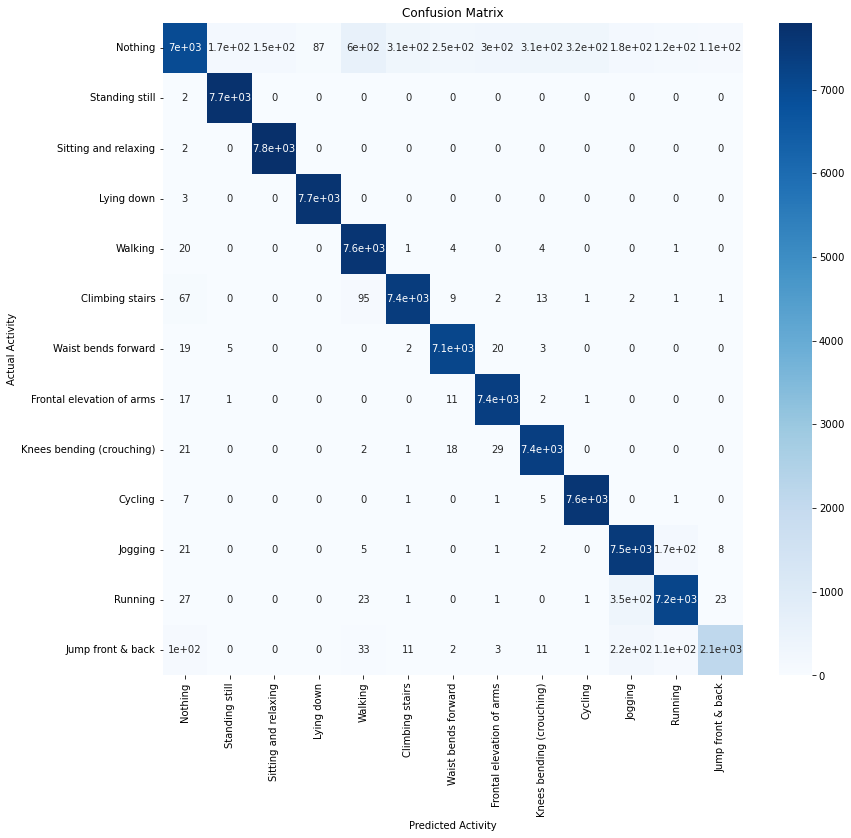

Accuracy Score : 95.3987%
Precision Score : 95.3413%
Recall Score : 95.2628%
F_1 Score : 95.0864%
Sensitvity : 95.2628%


In [23]:
resultsSummarizer(y_test,y_pred)